In [1]:
#K-Means Clustering

#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Load and display the dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.shape

(150, 4)

In [7]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

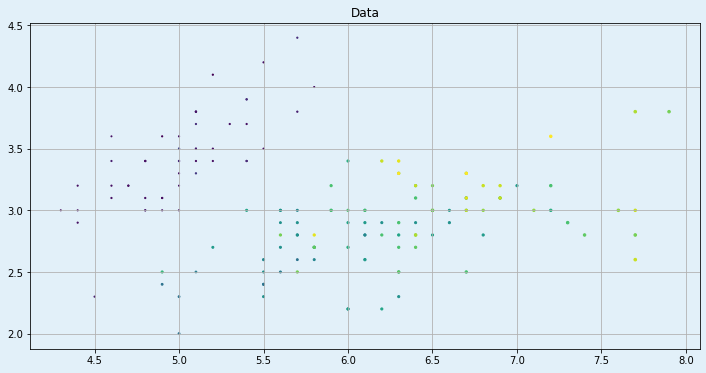

In [8]:
#Plotting the Data

plt.figure(figsize = (12,6), facecolor = '#e2f0f9')
ax = plt.gca()
ax.set_facecolor('#e2f0f9')
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],iris_df['petal length (cm)'],iris_df['petal width (cm)'])
plt.title('Data')
plt.grid(True)
plt.show()

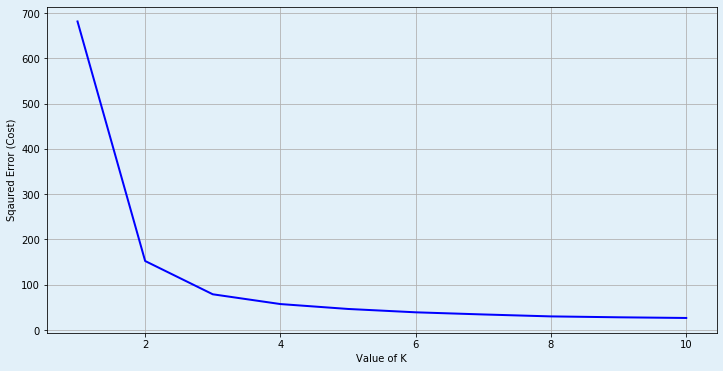

In [9]:
#Finding the optimum value of K using Elbow method

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0) 
    KM.fit(x) 
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)  
    
plt.figure(figsize = (12,6), facecolor = '#e2f0f9')
ax = plt.gca()
ax.set_facecolor('#e2f0f9')
plt.plot(range(1, 11), cost, color ='b', linewidth ='2') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.grid(True)
plt.show()

In [10]:
KM = KMeans(n_clusters = 3, init = 'k-means++',
            max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = KM.fit_predict(x)

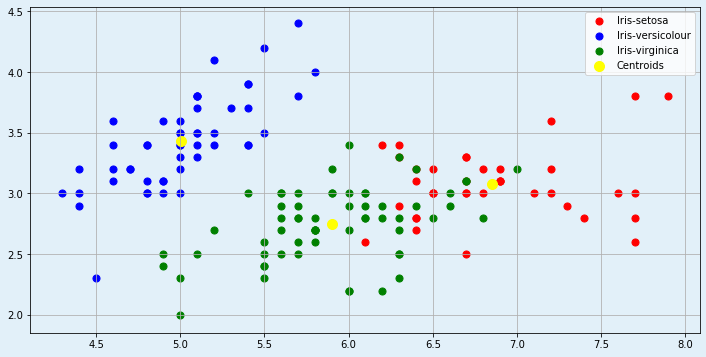

In [11]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (12,6), facecolor = '#e2f0f9')
ax = plt.gca()
ax.set_facecolor('#e2f0f9')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.grid()
plt.legend()